In [0]:
import numpy as np
import pandas as pd
import os
import io
import matplotlib.pyplot as plt
import cv2
import time
from sklearn.svm import SVC
from joblib import dump


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%%time
!cp -r /content/gdrive/My\ Drive/MURA_files/data/MURA-v1.1.zip MURA-v1.1.zip
!unzip -q MURA-v1.1.zip
!cp -r /content/gdrive/My\ Drive/MURA_files/data/processed processed

In [0]:
!ls processed

train_all.csv	   train_hand.csv      valid_all.csv	  valid_hand.csv
train_elbow.csv    train_humerus.csv   valid_elbow.csv	  valid_humerus.csv
train_finger.csv   train_shoulder.csv  valid_finger.csv   valid_shoulder.csv
train_forearm.csv  train_wrist.csv     valid_forearm.csv  valid_wrist.csv


In [0]:
mura_prefix = '/content/'
train_csv = '/content/processed/train_hand.csv'
valid_csv = '/content/processed/valid_hand.csv'

In [0]:
data = pd.read_csv(train_csv)
data_val = pd.read_csv(valid_csv)
print(data.shape, data_val.shape)

(5543, 6) (460, 6)


In [0]:
# iteratively read and process images
def process_img(path):
  img_name = os.path.join(mura_prefix, path)
        
  image = cv2.imread(img_name, 0)
  ## thresholding
  image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)  
  image = cv2.resize(image, (227, 227))
  return image.reshape(1, 227 * 227)

In [0]:
X = np.zeros(shape=(len(data), 227 * 227))
y = data.loc[:, 'result']
for r in range(len(data)):
  img = process_img(data.loc[r, 'path'])
  X[r, :] = img

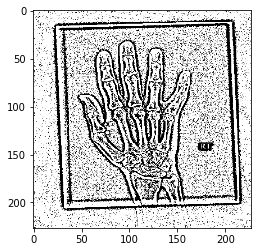

In [0]:
plt.imshow(X[0].reshape(227, -1), cmap='gray')

In [0]:
X_val = np.zeros(shape=(len(data_val), 227 * 227))
y_val = data_val.loc[:, 'result']
for r in range(len(data_val)):
  img = process_img(data_val.loc[r, 'path'])
  X_val[r, :] = img

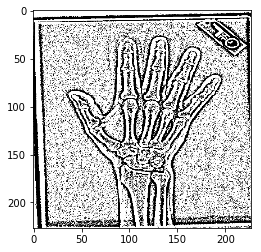

In [0]:
plt.imshow(X_val[0].reshape(227, -1), cmap='gray')

In [0]:
X = X / 255
X_val = X_val / 255

In [0]:
# train svm on this data
from sklearn.svm import SVC

In [0]:
svc = SVC(cache_size=1000, verbose=True, random_state=666)

In [0]:
%%time
model = svc.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]CPU times: user 40min 31s, sys: 4.69 s, total: 40min 35s
Wall time: 40min 36s


In [0]:
from joblib import dump
dump(model, 'svm_hand.joblib')

['svm_hand.joblib']

In [0]:
%%time
model.score(X_val, y_val)

CPU times: user 3min 22s, sys: 184 ms, total: 3min 22s
Wall time: 3min 22s


0.5891304347826087

In [0]:
!cp svm_hand.joblib /content/gdrive/My\ Drive/MURA_files/models/

In [0]:
!ls /content/gdrive/My\ Drive/MURA_files/models

models	svm_hand.joblib


In [0]:
np.random.randint(10000, size=(100, ))

array([1224, 2183, 5229, 9712, 9746, 5852, 3270, 2866,  303, 3041,  262,
       2178, 3651, 5608, 2706,  352, 2041, 7836, 7606, 6915, 7740, 9860,
       1139, 8383,  553, 2126, 4523,  420, 8495, 8576,  973, 3909, 1634,
       9758, 9487,  318, 7312, 8702, 8688, 9728, 1172, 3394, 5635, 2723,
       4324, 5569, 8416, 1656, 6107, 7617, 1323, 3565, 7002,  538, 7902,
       4997, 8233, 5647, 9776, 5879, 4876, 3815, 5768, 1461, 4012, 1018,
       3057, 4233, 9426, 8428, 2713, 8772, 7814, 7244, 3535, 4246, 5479,
       8022, 5728, 7940, 3518, 9132,  488, 6756, 7612, 2952, 3268, 7706,
        428, 5730, 5084, 2692, 1276, 4371,  679, 4781, 2252, 8385, 6593,
       4770])

In [0]:
!ls -la processed/

total 8756
drwx------ 2 root root    4096 Apr 10 06:16 .
drwxr-xr-x 1 root root    4096 Apr 10 04:59 ..
-rw------- 1 root root 4103648 Apr 10 03:10 train_all.csv
-rw------- 1 root root  541529 Apr 10 03:10 train_elbow.csv
-rw------- 1 root root  570740 Apr 10 03:10 train_finger.csv
-rw------- 1 root root  207585 Apr 10 03:10 train_forearm.csv
-rw------- 1 root root  596107 Apr 10 03:10 train_hand.csv
-rw------- 1 root root  144972 Apr 10 03:10 train_humerus.csv
-rw------- 1 root root  971963 Apr 10 03:10 train_shoulder.csv
-rw------- 1 root root 1070980 Apr 10 03:10 train_wrist.csv
-rw------- 1 root root  357309 Apr 10 03:10 valid_all.csv
-rw------- 1 root root   51183 Apr 10 03:10 valid_elbow.csv
-rw------- 1 root root   51703 Apr 10 03:10 valid_finger.csv
-rw------- 1 root root   34355 Apr 10 03:10 valid_forearm.csv
-rw------- 1 root root   49636 Apr 10 03:10 valid_hand.csv
-rw------- 1 root root   32862 Apr 10 03:10 valid_humerus.csv
-rw------- 1 root root   65339 Apr 10 03:10 valid

In [0]:
 base = '/content/processed/'
val_scores = {}
for part in ['forearm', 'shoulder', 'finger', 'humerus']:
  data_train = pd.read_csv(base + 'train_' + part + '.csv')
  data_val = pd.read_csv(base + 'valid_' + part + '.csv')
  
  X = np.zeros(shape=(len(data_train), 227 * 227))
  y = data_train.loc[:, 'result']
  for r in range(len(data_train)):
    img = process_img(data_train.loc[r, 'path'])
    X[r, :] = img
  
  X_val = np.zeros(shape=(len(data_val), 227 * 227))
  y_val = data_val.loc[:, 'result']
  for r in range(len(data_val)):
    img = process_img(data_val.loc[r, 'path'])
    X_val[r, :] = img
    
  # scale images
  X = X / 255
  X_val = X_val / 255
    
  print(part, 'train shape', X.shape, 'valid shape', X_val.shape)
  
  print('fitting {0} svm'.format(part))
  svc = SVC(cache_size=1000, verbose=True, random_state=666)
  since = time.time()
  model = svc.fit(X, y)
  total_time = time.time() - since
  print('took ', total_time // 60 ,'m', total_time % 60, 's', ' to fit')
  
  print('\nvalidation')
  score = model.score(X_val, y_val)
  val_scores[part] = score
  
  ## save model
  filename = 'svm_' + part + '.joblib'
  print('dumping model to {0}'.format(filename))
  dump(model, filename)
  !cp {filename} /content/gdrive/My\ Drive/MURA_files/models/
  
  del svc
  del X, X_val, y, y_val

forearm train shape (1825, 51529) valid shape (301, 51529)
fitting forearm svm


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]took  5.0 m 5.292234420776367 s  to fit

validation
dumping model to svm_forearm.joblib
shoulder train shape (8379, 51529) valid shape (563, 51529)
fitting shoulder svm


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]took  111.0 m 55.59747529029846 s  to fit

validation
dumping model to svm_shoulder.joblib
finger train shape (5106, 51529) valid shape (461, 51529)
fitting finger svm


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]took  38.0 m 0.023439884185791016 s  to fit

validation
dumping model to svm_finger.joblib
humerus train shape (1272, 51529) valid shape (288, 51529)
fitting humerus svm


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]took  2.0 m 44.99377655982971 s  to fit

validation
dumping model to svm_humerus.joblib


In [0]:
val_scores

{'finger': 0.6702819956616052,
 'forearm': 0.5083056478405316,
 'humerus': 0.5277777777777778,
 'shoulder': 0.6518650088809946}

In [0]:
filename = 'svm_wrist.joblib'
dump(model, filename)
!cp {filename} /content/gdrive/My\ Drive/MURA_files/models/

In [0]:
!ls /content/gdrive/My\ Drive/MURA_files/models/

models		  svm_finger.joblib   svm_hand.joblib	  svm_shoulder.joblib
svm_elbow.joblib  svm_forearm.joblib  svm_humerus.joblib  svm_wrist.joblib
